In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1= pd.read_csv("creditcard.csv")

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Let us check for any null values

In [4]:
df_1.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values to deal with.

Let us drop some duplicates to get a clean data.

In [5]:
df_1.drop_duplicates(subset = None, inplace = True)

In [6]:
df_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


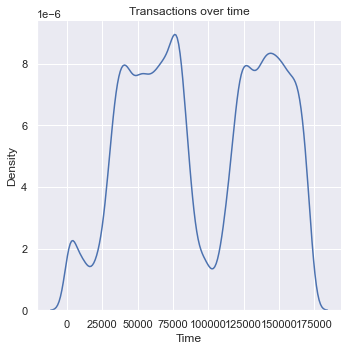

In [7]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,8)})

sns.displot(df_1["Time"],  kind = "kde").set(title = "Transactions over time")

The above graph spans over 2 days as one day should end at 86,400 seconds and that is where the graph roughly hits a local minimum.

Two peaks indicate the highest number of transactions in each day. 

Let us calculate the percentage of total transactions that are actually fraud

In [8]:
df_1["Class"].value_counts()[1] / df_1["Class"].shape[0] * 100

0.1667101358352777

<AxesSubplot:xlabel='Class', ylabel='count'>

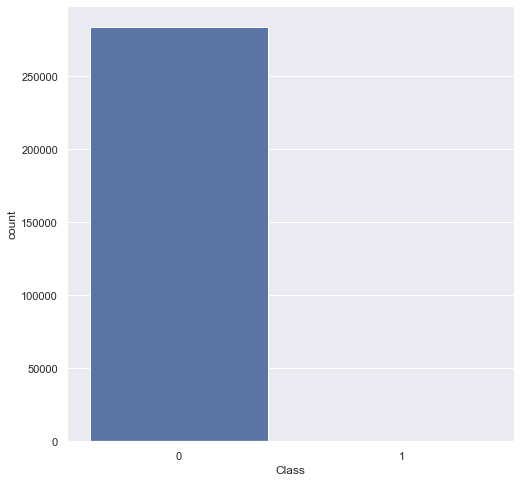

In [9]:
sns.countplot(x = "Class", data = df_1)

We notice a huge imbalance of Class 0 (Non-Fraud) vs Class 1 (Fraud) in the dataset and that is expected as most transactions are non-fradulent and picking out the fradulent transactions in a sea of proper regular day to day transactions is the main challenge of any fraud detection analysis.

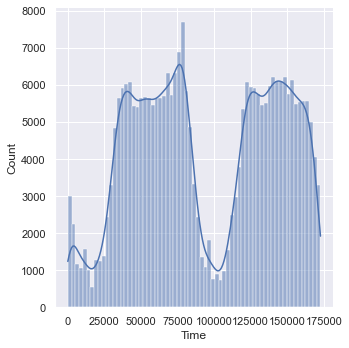

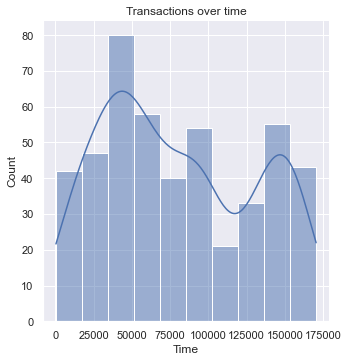

In [10]:


sns.displot(df_1["Time"], kde = True)



sns.displot(df_1[df_1["Class"] == 1]["Time"], kde = True).set(title = "Transactions over time")

plt.show()

In [11]:
#pip install imblearn

In [12]:
from imblearn.over_sampling import RandomOverSampler

df_1_viz = df_1.copy()

method = RandomOverSampler(sampling_strategy=0.5)

#This would ensure that the minority class was oversampled to have half the number of examples as the majority class, 
#for binary classification problems. This means that if the majority class had 1,000 examples and the minority class had 100,
#the transformed dataset would have 500 examples of the minority class.



y = df_1_viz["Class"].copy()

X = df_1_viz.drop("Class", axis = 1)

X_resampled, y_resampled = method.fit_resample(X, y)

In [13]:
df_2_viz = pd.concat([X_resampled, y_resampled], axis=1, join="outer")

df_2_viz["Time"] = df_2_viz["Time"].apply(lambda x: x/(60 *60))

In [14]:
df_2_viz.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


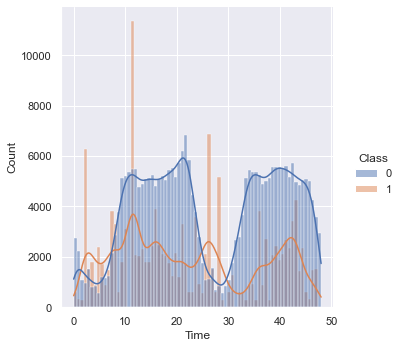

In [15]:
sns.displot(data = df_2_viz, x ="Time", kde = True, hue = "Class")


So we have over-sampled our fraud data so that it is comparable to the non-fraud data in terms of frequency.
The purpose of the over-sampling is simply to be able to visualize during which times the most frequent fraudulent activites occur.

Time 0 is 12 am from Day 1 and counts onwards, so we can see that at around 2 am , 10 am and 6 pm are some peak times for fraudulent activities.

But it is difficult to say with certainty if this is a relevant time indicator for fraud. For significant results we would need data spanning over months and analyze hourly fraudulent patterns.


<AxesSubplot:>

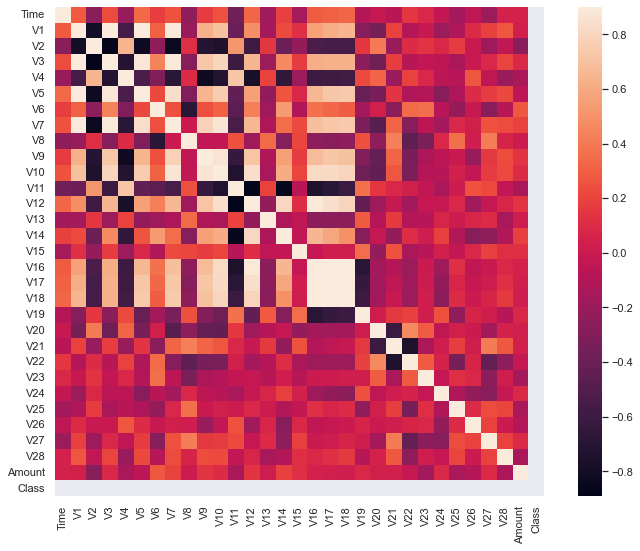

In [16]:
corrmat = df_1.loc[df_1["Class"] == 1].corr()

plt.subplots(figsize = (12,9))

sns.heatmap(corrmat, vmax = 0.9, square = True)

<AxesSubplot:>

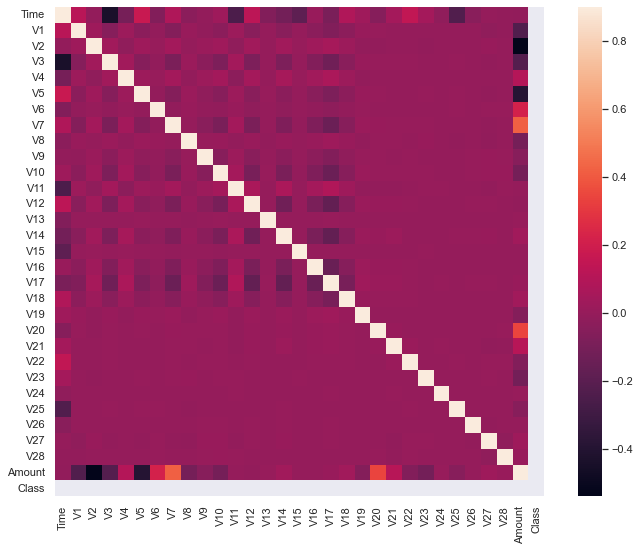

In [17]:
corrmat = df_1.loc[df_1["Class"] == 0].corr()

plt.subplots(figsize = (12,9))

sns.heatmap(corrmat, vmax = 0.9, square = True)

Most of the features in the dataset are obtained from PCA except Time and Amount.
So we need to scale the Amounts feature so that it does not dominate the rest of the features which has a smaller range.

**LOG SCALING**:

Log scaling works best after trying out min-max scaling and standardization

<AxesSubplot:xlabel='Class', ylabel='Amount'>

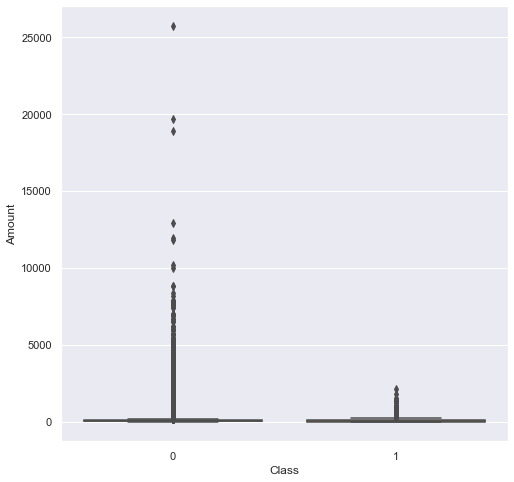

In [18]:
sns.boxplot(data = df_1, x = "Class", y = "Amount")

The box plot shows that we need to normalize the data. A log(1+x) transformation should take care of this.

In [19]:


df_1["Amount"] = np.log1p(df_1["Amount"])

<AxesSubplot:xlabel='Class', ylabel='Amount'>

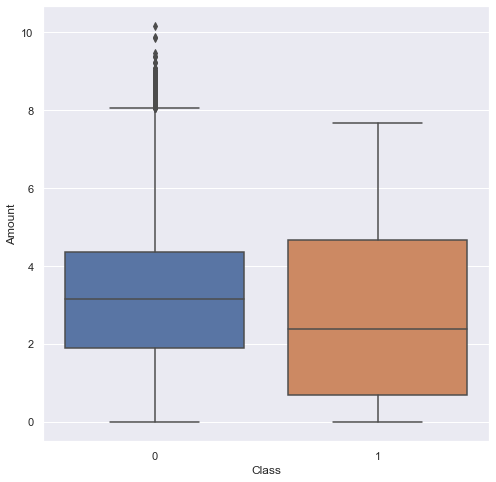

In [27]:
sns.boxplot(data = df_1, x = "Class", y = "Amount")

In [21]:
df_1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,3.153760,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,1.657080,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,1.887070,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,3.135494,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,4.363226,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,10.153941,1.000000


sns.boxplot(data = df_1, x = "Class", y = "Amount")

We can proceed with preparing our X and y for the predictive model

In [22]:
X = df_1.drop("Class", axis = 1)

y = df_1["Class"]

<AxesSubplot:xlabel='Time', ylabel='Amount'>

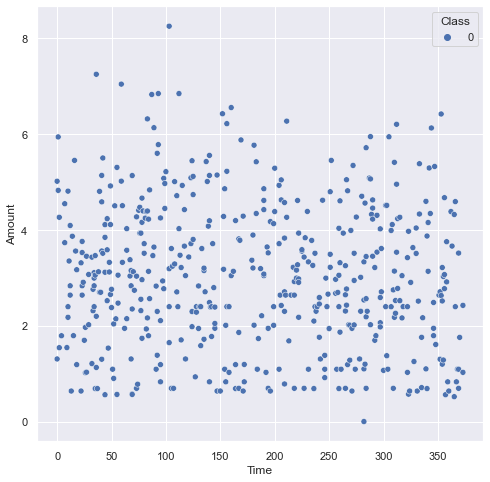

In [32]:
sns.scatterplot(data=df_1.iloc[:500], y = "Amount", x = "Time", hue = "Class")

Now to handle the class imbalance in front of us, so in reality fraud transactions are much lower compared to non-fraud transactions but our predicitve model can theoretically predict all cases to be non-fraud and obtain a 99.9% accuracy simply because we only have 0.2% of fraud transactions. 

To tackle this we can explore different sampling strategies to balance out the classes.


## Under sampling: ##

Undersampling will remove data from the majority set in order to balance with the minority set.
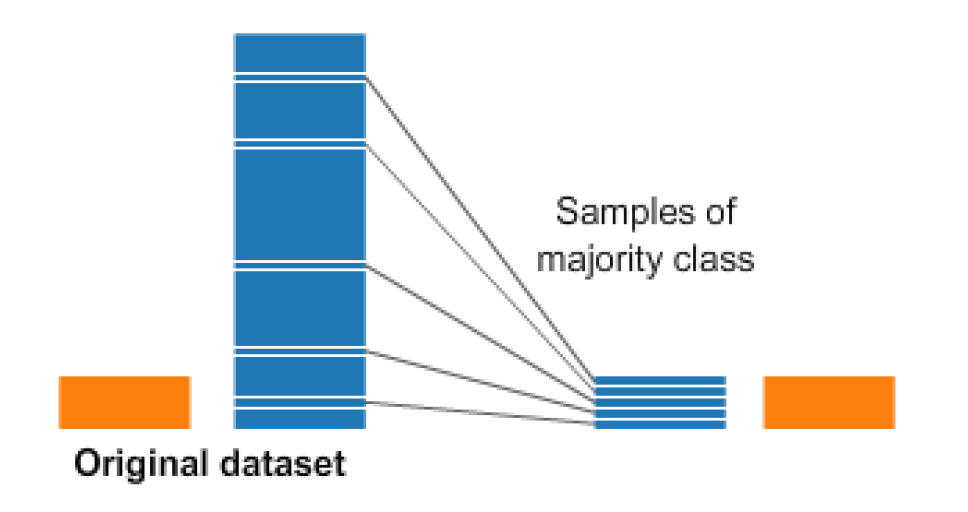

## Over sampling: ##

The minority samples are randomly duplicated in order to balance with the majority set.
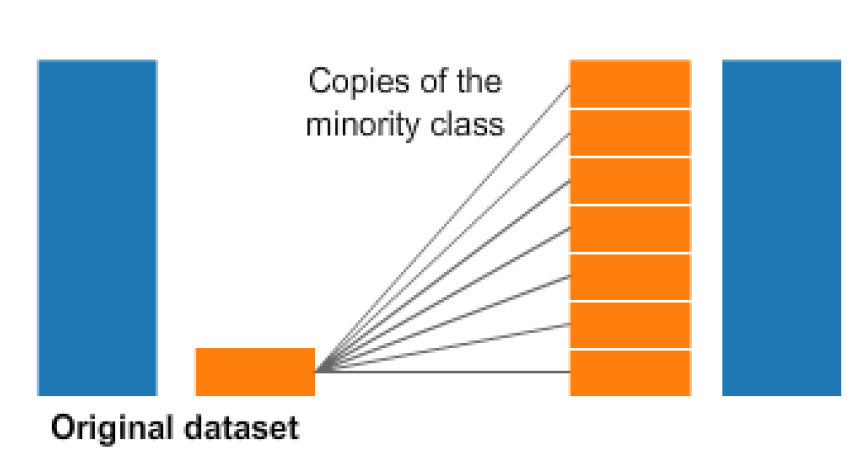

## Synthetic Minority Over Sampling Technique: ##

The under sampling loses many data and the over sampling generates a lot of duplicated data, in both cases the ml model is not working with any variety of fraud to make it robust.

SMOTE randomly selects fraud instances and k of the nearest neighbors are found and then a randomly selected neighbor is chosen and a fake instance is created between the two random instances.

So to better understand let us see below:

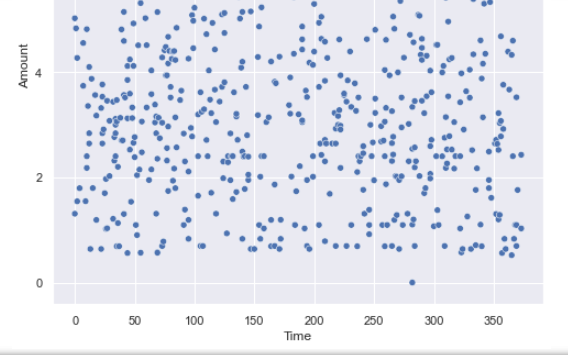

Here we see the blue marks as the majority non-fraud and orange as the fraude cases. So say we have defined k and we are looking within this circle neighborhood then the new generated sample is along a line between any two random real fraud data.

The position of the fraud data is determined by randomly determining a value between 0 and 1. 

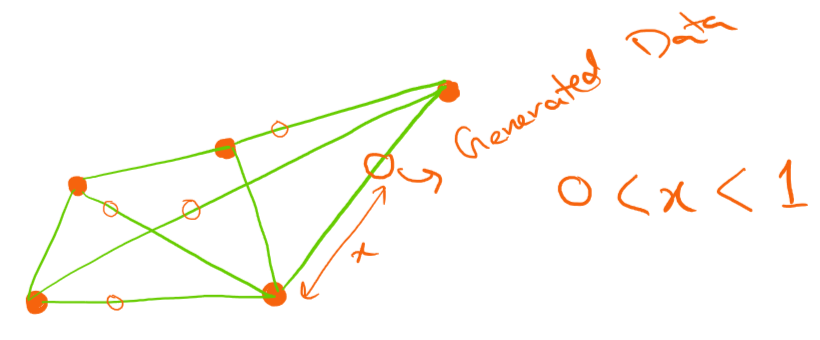

## Adaptive Synthetic Samples (ADASYN) ##

The ADASYN is similar to the SMOTE but is able to figure out which neighborhood needs more fake data depending on the difficulty of learning. The harder to learn neighborhoods is given priority for more fake data,

Another important difference is that instead of generating a data point along the line between two random fraud cases, it will be slighly away from the line, so effectively adding some variance.

This is done to prevent it being linearly correlated with the other fraud instances, which is very important for feeding into the machine learning model.

See below:
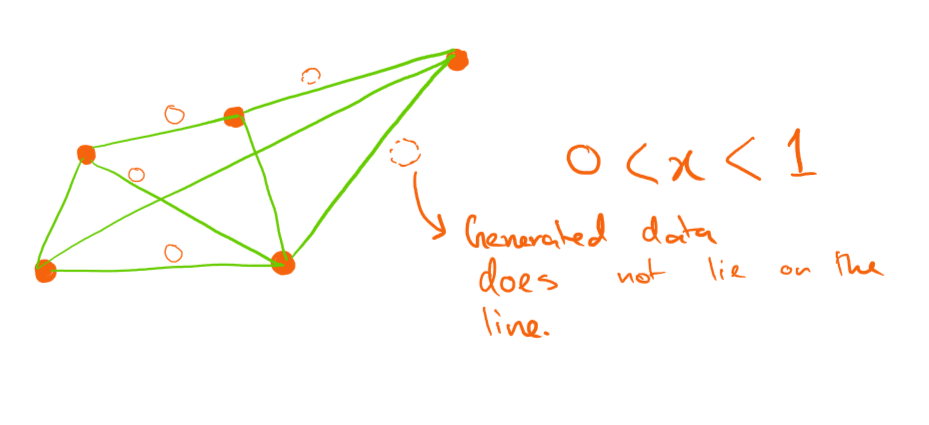

We will split the data before sampling them to balance the classes.

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

from sklearn import metrics

## Under Sample ##

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, shuffle=True)


under_samples = RandomUnderSampler(sampling_strategy="majority")

X_train_under, y_train_under = under_samples.fit_resample(X_train, y_train)

X_test_under, y_test_under = X_test, y_test

print("X_train_under: ",X_train_under.shape)
print("y_train_under: ",y_train_under.shape)
print("X_test_under: ",X_test_under.shape)
print("y_test_under: ",y_test_under.shape)

X_train_under:  (682, 30)
y_train_under:  (682,)
X_test_under:  (85118, 30)
y_test_under:  (85118,)


## Over Sampler ##

In [36]:
over_sampler = RandomOverSampler(sampling_strategy='minority')

X_train_over,y_train_over=over_sampler.fit_resample(X_train, y_train)

X_test_over, y_test_over = X_test, y_test 

print("X_train_over: ",X_train_over.shape)
print("y_train_over: ",y_train_over.shape)
print("X_test_over: ",X_test_over.shape)
print("y_test_over: ",y_test_over.shape)

X_train_over:  (396534, 30)
y_train_over:  (396534,)
X_test_over:  (85118, 30)
y_test_over:  (85118,)


## SMOTE ##

In [37]:

smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train_smote:  (396534, 30)
y_train_smote:  (396534,)
X_test_smote:  (85118, 30)
y_test_smote:  (85118,)


## ADASYN ##

In [38]:
adasyn= ADASYN(sampling_strategy='minority')
X_train_adasyn,y_train_adasyn=adasyn.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = X_test, y_test

print("X_train_adasyn: ",X_train_adasyn.shape)
print("y_train_adasyn: ",y_train_adasyn.shape)
print("X_test_adasyn: ",X_test_adasyn.shape)
print("y_test_adasyn: ",y_test_adasyn.shape)

X_train_adasyn:  (396446, 30)
y_train_adasyn:  (396446,)
X_test_adasyn:  (85118, 30)
y_test_adasyn:  (85118,)


We can evaluate the different sampled data using F1 score and ROC curve

In [49]:
def model_eval(sampling_name, model, X_train, y_train, X_test, y_test):
    
    #build model
    model.fit(X_train, y_train)
    
    #obtain predictions
    
    y_pred = model.predict(X_test)
    
    #Accuracy
    
    acc_score = metrics.accuracy_score(y_test, y_pred)
    
    #Area under Curve
    
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Precision
    
    prec_score = metrics.precision_score(y_test, y_pred)
    
    #recall score
    
    recall_score = metrics.recall_score(y_test, y_pred)
    
    #f1
    
    f1_score = metrics.f1_score(y_test, y_pred)
    
    #confusion matrix
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    print("Sampling method", sampling_name)
    print("Accuracy", acc_score)
    print("AOC", auc)
    print("Precision", prec_score)
    print("Recall", recall_score)
    print("F1 Score", f1_score)
    print("Confusion Matrix", cnf_matrix)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,linewidth=2, label=sampling_name + ", auc="+str(auc))
    

    

Sampling method Under Sampling
Accuracy 0.9512206583801311
AOC 0.9339704971014834
Precision 0.028390427029563584
Recall 0.9166666666666666
F1 Score 0.05507510241238051
Confusion Matrix [[80845  4141]
 [   11   121]]


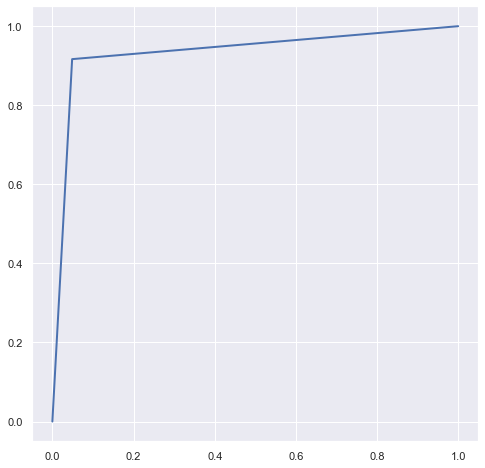

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="multinomial")
model_eval("Under Sampling",log_reg, X_train_under, y_train_under, X_test, y_test)